<a href="https://colab.research.google.com/github/Sandwhaletree/2023.05_Tibame/blob/main/%E9%80%B2%E9%9A%8EDL_%E6%9D%8E%E6%99%BA%E6%8F%9A_Class/001_PyTorch_Linear_CIFAR10_0713.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic module
import numpy as np #矩陣操作
import matplotlib.pyplot as plt
from tqdm.auto import tqdm # progress bar

# PyTorch
import torch #深度學習函式庫
import torch.nn as nn #神經元架構與損失函數(與網路層模型相關套件)
import torchvision #針對影像處理
from torchvision import transforms # 資料前處理

In [2]:
# print version of PyTorch
torch.__version__, torchvision.__version__

('2.0.1+cu118', '0.15.2+cu118')

check是否有用gpu:執行階段->變更執行階段類型

In [3]:
#用於查詢和監控 NVIDIA GPU 的狀態
!nvidia-smi

Wed Jul 19 15:22:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### Prepare CIFAR10 Dataset

*   torch vision datasets(公開資料集): https://pytorch.org/vision/stable/datasets.html
*   CIFAR10 label，共有10個種類

> 0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

In [4]:
# Define Parameters
NUM_CLASS = 10 #類別共10個種類

# Class name and class mapping
class_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]
class_map = {cls: i for i, cls in enumerate(class_names)} #build類別圖，每個種類對應到分別是0~9哪一個
print(class_map)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


#### torch.utils.data.Dataset


https://pytorch.org/docs/stable/data.html?highlight=dataset#torch.utils.data.Dataset
* 本次直接拿現成Dataset做，處理內容如下
* read **1** sample (img, label) #如何將1筆資料讀出
* Convert to **Torch.Tensor** #把資料轉換成Torch.Tensor形式(所有資料都要以這個形式輸出=numoy array形式)
* Datasets provided by torchvision https://pytorch.org/vision/stable/datasets.html

In [5]:
# Download dataset(本次直接拿現成Dataset做，以後會教怎麼自己做)
train_ds = torchvision.datasets.CIFAR10('data', # saved path #train_ds訓練資料
    train=True, # training or testing set
    download=True # download dataset from internet
)
val_ds = torchvision.datasets.CIFAR10('data', #val_ds驗證資料
    train=False,
    download=True
)

100%|██████████| 170498071/170498071 [00:03<00:00, 47614325.24it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [7]:
# Check your dataset 檢查資料集大小(共6萬筆=每個種類6000張照片*10種類)
print('Number of training   samples:', len(train_ds))
print('Number of validation samples:', len(val_ds))
print(type(train_ds))

Number of training   samples: 50000
Number of validation samples: 10000
<class 'torchvision.datasets.cifar.CIFAR10'>


In [8]:
# Random select a sample 隨機取樣本查看照片
idx = np.random.randint(low=0, high=len(train_ds)) #使用 numpy 的 random.randint 函數來生成一個隨機整數 idx，這個整數的範圍是從 0 到 len(train_ds)（訓練數據集的大小）
img, label = train_ds[idx] #img圖片, label答案

# Type of img and label
print(idx) #第10822筆資料
print(type(img), type(label)) #<class 'PIL.Image.Image'> ，透過python本身的PIL.Image來做讀取

10822
<class 'PIL.Image.Image'> <class 'int'>


img shape:  (32, 32, 3)
label:  8
class name:  ship


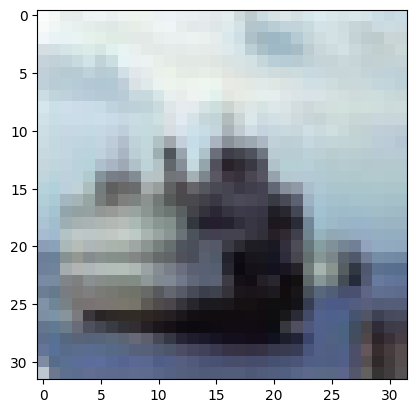

In [10]:
# Convert to np.ndarray and show image
img_np = np.array(img) #可將img轉換成np.array組數
print('img shape: ', img_np.shape) #(32, 32, 3)
print('label: ', label) #8
print('class name: ', class_names[label]) #ship
plt.imshow(img_np)
plt.show()

#### Data Proprocess



1. Convert **PIL.Image** to **torch.FloatTensor** (浮點數張量=小數點張量)
  * Converts a **PIL Image or numpy.ndarray** (H, W, C) in the range [0, 255] to a **torch.FloatTensor** of shape (C, H, W) in the range [0.0, 1.0]
  * #亮度值[0, 255] #需將H, W, C轉換成C, H, W，通道數c要放在最前面 #range [0.0, 1.0]數值將會轉成0-1

2.   TODO: Data Augmentation, ... etc

In [11]:
preprocess = transforms.Compose([
    transforms.ToTensor(), # Convert to Tensor #圖片前處理(最基本)=將圖片轉成必須之FloatTensor型態(H, W, C轉換成C, H, W、數值將會轉成0-1)
    # ... #之後可能會新學技術
])

In [12]:
# Build dataset with data preprocess
train_ds = torchvision.datasets.CIFAR10('data',
    train=True,
    download=True,
    transform=preprocess) #transform=preprocess，指將圖片做transforms.ToTensor()的前處理，官方有給基本指令
val_ds = torchvision.datasets.CIFAR10('data',
    train=False,
    download=True,
    transform=preprocess)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
# Random select a sample
idx = np.random.randint(low=0, high=len(train_ds))
img, label = train_ds[idx]

# Type of img and label
print(idx)
print(type(img), type(label)) #type(img)由原本<class 'PIL.Image.Image'>，轉成<class 'torch.Tensor'>形式
print(img.shape)

24553
<class 'torch.Tensor'> <class 'int'>
torch.Size([3, 32, 32])


#### Combine Dataset with DataLoader 資料批次化

**torch.utils.data.DataLoader**: https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

* form a **batch** #一個批次的量
* data sampler
* reading order (shuffle)

In [14]:
# Use DataLoader to generate minibatches
BATCH_SIZE = 256

train_dataloader = torch.utils.data.DataLoader(
    train_ds, #訓練資料
    batch_size=BATCH_SIZE, #BATCH_SIZE
    shuffle=True) #shuffle=要不要把順序打亂，通常訓練資料會打亂順序，驗證資料則不用
val_dataloader = torch.utils.data.DataLoader(
    val_ds,
    batch_size=BATCH_SIZE)

**Check shape of data檢查資料形狀**

* N: number of samples

* C: channels

* H: Height

* W: Width

**PyTorch use channel first !**

In [16]:
#檢查資料
for x, y in train_dataloader:
    print("type ", type(x), type(y)) #都是張量的形式<class 'torch.Tensor'>
    print("Shape of x [N, C, H, W]: ", x.shape, x.dtype) #x.shape=一批量的訓練資料=256筆，每個大小都是3, 32, 32 #圖片是浮點數torch.float32
    print("Shape of y [N]: ", y.shape, y.dtype) #y.shape=一批量的驗證資料=256筆 #y.dtype=每筆資料是整數torch.int64
    break

type  <class 'torch.Tensor'> <class 'torch.Tensor'>
Shape of x [N, C, H, W]:  torch.Size([256, 3, 32, 32]) torch.float32
Shape of y [N]:  torch.Size([256]) torch.int64


(<matplotlib.image.AxesImage at 0x7d00c3a49f90>, tensor(5))

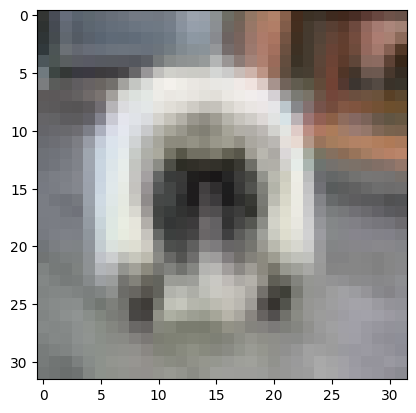

In [17]:
# permute: [C, H, W] -> [H, W, C]
plt.imshow(x[0].permute(1, 2, 0)), y[0]  #顯示第一張圖像，並對應相對的標籤 y[0]

#### Build Model

In [18]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu" #如果你有gpu，則搬到gpu，否則搬到cpu
print(f"Using device: {device}")

IMG_SIZE = 32

Using device: cuda


nn.Sequential-簡單的

In [19]:
model = nn.Sequential(
    nn.Flatten(), # (C, H, W) -> (C*H*W)
    nn.Linear(in_features=IMG_SIZE*IMG_SIZE*3, out_features=64), # (C*H*W) -> (64)
    nn.ReLU(), # activation
    nn.Linear(64, 128), # (64) -> (128)
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128, NUM_CLASS), # (128) -> NUM_CLASS
)

nn.Module Subclass-複雜的(採繼承的方式設計)

In [21]:
# Define model
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten() # (C, H, W) -> (C*H*W)
        self.base_model = nn.Sequential(
            nn.Linear(in_features=IMG_SIZE*IMG_SIZE*3, out_features=64), # (C*H*W) -> (64)
            nn.ReLU(),
            nn.Linear(64, 128), # (64) -> (128)
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, NUM_CLASS), # (128) -> NUM_CLASS
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.base_model(x)
        return logits

In [22]:
# init model and move to GPU device
model = NeuralNet().to(device)

In [23]:
#基本model資訊
# Print basic model architecture
print(model)

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (base_model): Sequential(
    (0): Linear(in_features=3072, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [24]:
#進階model資訊
# Use torchsummary to print advanced info
import torchsummary

torchsummary.summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                 [-1, 3072]               0
            Linear-2                   [-1, 64]         196,672
              ReLU-3                   [-1, 64]               0
            Linear-4                  [-1, 128]           8,320
              ReLU-5                  [-1, 128]               0
            Linear-6                  [-1, 128]          16,512
              ReLU-7                  [-1, 128]               0
            Linear-8                   [-1, 10]           1,290
Total params: 222,794
Trainable params: 222,794
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.03
Params size (MB): 0.85
Estimated Total Size (MB): 0.89
----------------------------------------------------------------


In [25]:
#進階model資訊
# Use torchinfo to print advanced info
!pip install torchinfo

import torchinfo
torchinfo.summary(model, input_size=(BATCH_SIZE, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNet                                [256, 10]                 --
├─Flatten: 1-1                           [256, 3072]               --
├─Sequential: 1-2                        [256, 10]                 --
│    └─Linear: 2-1                       [256, 64]                 196,672
│    └─ReLU: 2-2                         [256, 64]                 --
│    └─Linear: 2-3                       [256, 128]                8,320
│    └─ReLU: 2-4                         [256, 128]                --
│    └─Linear: 2-5                       [256, 128]                16,512
│    └─ReLU: 2-6                         [256, 128]                --
│    └─Linear: 2-7                       [256, 10]                 1,290
Total params: 222,794
Trainable params: 222,794
Non-trainable params: 0
Total mult-adds (M): 57.04
Input size (MB): 3.15
Forward/backward pass size (MB): 0.68
Params size (MB): 0.89
Estimated Total Size (MB): 4

#### Training: Optimizing the Model Parameters

In [26]:
#採用哪種loss function? #優化策略
loss_fn = nn.CrossEntropyLoss() # Softmax + negative log likelihood loss (nn.NLLLoss)
optimizer = torch.optim.SGD( #優化策略
    params=model.parameters(), # parameters to optimize
    lr=1e-2, # learning rate: 1e-4, 1e-2...
)

In [27]:
#訓練與驗證要做的事情
def train(dataloader, model, loss_fn, optimizer): #封裝函式
    size = len(dataloader.dataset) # number of samples
    num_batches = len(dataloader) # batches per epoch

    model.train() # to training mode. #將模型轉成訓練模式
    epoch_loss, epoch_correct = 0, 0
    for batch_i, (x, y) in enumerate(tqdm(dataloader, leave=False)): #將資料從dataloader一批批取出來
        x, y = x.to(device), y.to(device) # move data to device #把資料丟到gpu上

        # zero the parameter gradients
        optimizer.zero_grad() #把優化器歸零

        # Compute prediction loss
        pred = model(x) #計算預測值
        loss = loss_fn(pred, y) #計算誤差

        # Optimization by gradients
        loss.backward() # backpropagation to compute gradients #拿誤差去計算梯度
        optimizer.step() # update model params #讓optimizer幫你更新

        # write to logs[可客製化]
        epoch_loss += loss.item() # tensor -> python value #紀錄現在誤差是多少
        # (N, Class)[可客製化]
        epoch_correct += (pred.argmax(dim=1) == y).sum().item() #這批資料你算對幾筆

    # return avg loss of epoch, acc of epoch
    return epoch_loss/num_batches, epoch_correct/size #epoch_correct/size=準確率


def test(dataloader, model, loss_fn): #驗證測試是不需要更新模型，所以不需要optimizer
    size = len(dataloader.dataset) # number of samples
    num_batches = len(dataloader) # batches per epoch

    model.eval() # model to test mode. #model.eval()=不做訓練，它的表現會跟真正測試真實表現一樣
    epoch_loss, epoch_correct = 0, 0

    # No gradient for test data
    with torch.no_grad(): #計算不需要梯度
        for batch_i, (x, y) in enumerate(tqdm(dataloader, leave=False)):
            x, y = x.to(device), y.to(device)

            # Compute prediction loss
            pred = model(x)
            loss = loss_fn(pred, y)

            # write to logs
            epoch_loss += loss.item()
            epoch_correct += (pred.argmax(1) == y).sum().item()

    return epoch_loss/num_batches, epoch_correct/size

In [ ]:
EPOCHS = 10 #在每一個EPOCHS去做驗證與訓練
logs = {
    'train_loss': [], 'train_acc': [],
    'val_loss': [], 'val_acc': []
}
for epoch in tqdm(range(EPOCHS)): #將每個EPOCHS跑完，去做紀錄
    train_loss, train_acc = train(train_dataloader, model, loss_fn, optimizer)
    val_loss, val_acc = test(val_dataloader, model, loss_fn)

    print(f'EPOCH: {epoch} \
    train_loss: {train_loss:.4f}, train_acc: {train_acc:.3f} \
    val_loss: {val_loss:.4f}, val_acc: {val_acc:.3f} ')

    logs['train_loss'].append(train_loss)
    logs['train_acc'].append(train_acc)
    logs['val_loss'].append(val_loss)
    logs['val_acc'].append(val_acc)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 0     train_loss: 2.2937, train_acc: 0.122     val_loss: 2.2809, val_acc: 0.135 


  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 1     train_loss: 2.2602, train_acc: 0.146     val_loss: 2.2314, val_acc: 0.166 


  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 2     train_loss: 2.1881, train_acc: 0.177     val_loss: 2.1381, val_acc: 0.190 


  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 3     train_loss: 2.0950, train_acc: 0.221     val_loss: 2.0561, val_acc: 0.248 


  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 4     train_loss: 2.0297, train_acc: 0.260     val_loss: 2.0083, val_acc: 0.272 


  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 5     train_loss: 1.9854, train_acc: 0.275     val_loss: 1.9724, val_acc: 0.279 


  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 6     train_loss: 1.9496, train_acc: 0.291     val_loss: 1.9362, val_acc: 0.296 


  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 7     train_loss: 1.9193, train_acc: 0.305     val_loss: 1.9038, val_acc: 0.307 


  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 8     train_loss: 1.8940, train_acc: 0.316     val_loss: 1.8866, val_acc: 0.317 


  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

EPOCH: 9     train_loss: 1.8742, train_acc: 0.325     val_loss: 1.8828, val_acc: 0.317 


#### Logs

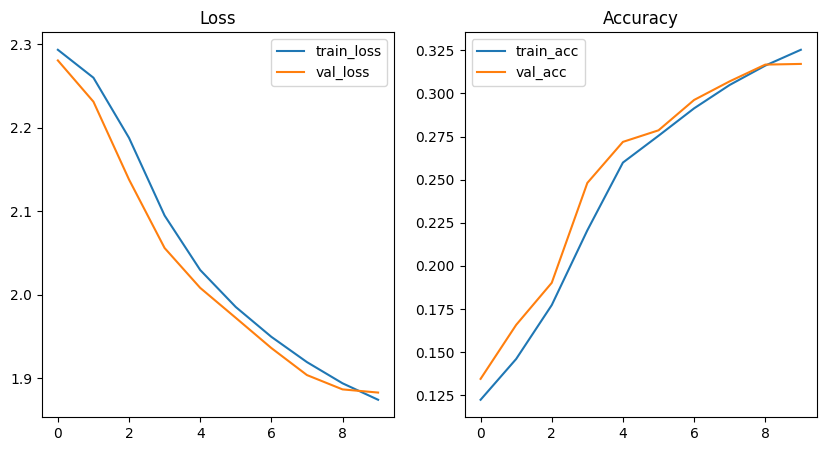

In [ ]:
# Plot loss curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(logs['train_loss'])
plt.plot(logs['val_loss'])
plt.legend(['train_loss', 'val_loss'])
# plot acc
plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(logs['train_acc'])
plt.plot(logs['val_acc'])
plt.legend(['train_acc', 'val_acc'])
plt.show()

#### Save Model

Saving & Loading Model (weights only)

**Recommended**

In [ ]:
# model parameters>透過.state_dict()獲得
model.state_dict()

OrderedDict([('base_model.0.weight',
              tensor([[ 0.0086, -0.0173, -0.0002,  ...,  0.0076,  0.0016,  0.0164],
                      [ 0.0135,  0.0122, -0.0082,  ..., -0.0038, -0.0051, -0.0068],
                      [ 0.0123, -0.0028, -0.0042,  ...,  0.0094, -0.0051, -0.0091],
                      ...,
                      [ 0.0021, -0.0052,  0.0157,  ...,  0.0272,  0.0066,  0.0173],
                      [ 0.0088,  0.0167, -0.0154,  ..., -0.0045,  0.0017, -0.0065],
                      [-0.0049,  0.0216,  0.0008,  ...,  0.0188,  0.0130, -0.0041]])),
             ('base_model.0.bias',
              tensor([-0.0039,  0.0348,  0.0247, -0.0320,  0.0184,  0.0063,  0.0024, -0.0256,
                      -0.0108, -0.0098,  0.0216, -0.0105,  0.0033, -0.0419,  0.0233,  0.0323,
                      -0.0096, -0.0177,  0.0251,  0.0167, -0.0244, -0.0101,  0.0264,  0.0169,
                       0.0025, -0.0149,  0.0126,  0.0345, -0.0011,  0.0143,  0.0047,  0.0044,
                  

In [ ]:
PATH = './model_weights.pth'
# save weights
torch.save(model.state_dict(), PATH)

# load weights
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Saving & Loading Model (entire model)

In [ ]:
MODEL_PATH = './model.pth'
# save model
torch.save(model, MODEL_PATH)
# load model
model = torch.load(MODEL_PATH)

#### Evaluation

In [ ]:
# load model
model = NeuralNet()

model.load_state_dict(torch.load(PATH))
model.eval()

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (base_model): Sequential(
    (0): Linear(in_features=3072, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
)

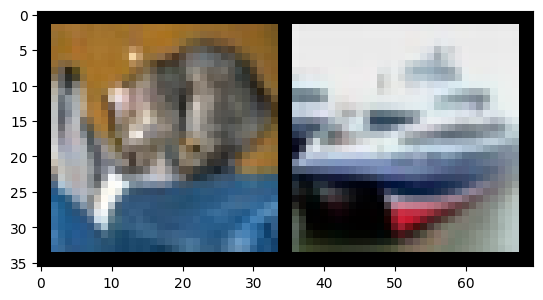

In [ ]:
# take first 2 images
n = 2
for (images, labels) in val_dataloader:
    images, labels = images[:n], labels[:n]
    images_grid = torchvision.utils.make_grid(images[:n])
    images_grid = images_grid.permute(1, 2, 0) # (C, H, W) -> (H, W, C)
    plt.imshow(images_grid.numpy())
    break

In [ ]:
# take first 2 images
n = 2
for (images, labels) in val_dataloader:
    images, labels = images[:n], labels[:n]
    break

# Predict by model
with torch.no_grad():
    pred = model(images) # predict logits
print('raw_prediction logtis', pred, pred.shape, sep="\n")

raw_prediction logtis
tensor([[-0.3993,  0.0278,  0.2435,  0.7078,  0.1771,  0.8769,  0.0630, -0.3083,
         -0.4939, -1.0681],
        [ 0.3500,  3.0835, -1.6331, -0.7447, -2.1139, -1.8306, -1.8176, -0.8185,
          2.6153,  3.6537]])
torch.Size([2, 10])


In [ ]:
pred_softmax = nn.Softmax(dim=1)(pred) # probabilities
print('prediction after softmax', pred_softmax, pred_softmax.shape, sep="\n")

prediction after softmax
tensor([[0.0591, 0.0905, 0.1123, 0.1787, 0.1051, 0.2117, 0.0938, 0.0647, 0.0537,
         0.0303],
        [0.0184, 0.2832, 0.0025, 0.0062, 0.0016, 0.0021, 0.0021, 0.0057, 0.1773,
         0.5009]])
torch.Size([2, 10])


In [ ]:
# max_prob: max probability of each samples
# predicted_cls: the index of max prob
max_prob, predicted_cls = torch.max(pred_softmax, dim=1) #在10維度，最大的資料為何

In [ ]:
predicted_cls = pred_softmax.argmax(dim=1)

In [ ]:
predicted_cls

tensor([5, 9])

In [ ]:
pred_softmax.argmax(dim=1)

tensor([5, 9])

In [ ]:
print('GroundTruth: ', ' '.join(class_names[labels[j]] for j in range(n)))
print('Prediction: ', ' '.join(class_names[predicted_cls[j]] for j in range(n)))

GroundTruth:  cat ship
Prediction:  dog truck
